# Week 9: Edge Detection in Images

<font size="6"> Laboratory 6 </font> <br>
<font size="3"> Last updated Jan 5, 2023 </font>

## <span style="color:orange;"> 00. Content </span>

<font size="5"> Mathematics </font>
- 3 dimensional vectors
- Taylor series
- Partial derivatives
- Second partial derivative test

<font size="5"> Programming Skills </font>
- Multi-dimensional array manipulation
- Functions

<font size="5"> Embedded Systems </font>
- N/A

## <span style="color:orange;"> 0. Required Hardware </span>
- N/A

<h3 style="background-color:lightblue"> Write your name and email below: </h3>

**Name:** Jun Kil 

**Email:** kilj@purdue.edu

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## <span style="color:orange;"> 1. Edge Detection </span>

Suppose we have a grayscale image and we want to outline all of the objects in the image. We can start by looking for all of the vertical edges in the image. An edge occurs when there is a significant change in intensity. Let's look a very small piece of the grayscale Italy image show in red.

Download the image we'll be using in this lab: [gray_italy.jpg](https://github.com/TheDataScienceLabs/DataLab_Multivariate_Calculus/blob/main/book/labs/1_Color_Labs/5_Edge_Detection/gray_italy.jpg).

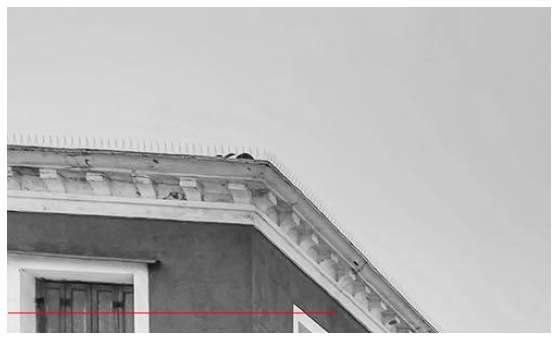

In [4]:
import matplotlib.patches as patches

gray_img = np.array(Image.open('gray_italy.jpg'))[:300,:500]

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(gray_img, cmap='gray')
rect = patches.Rectangle((0, 280), 300, 1, linewidth=0.5, edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax.axis('off')
plt.show()

By plotting the grayscale values as a 1D function, we can see how the grayscale values change moving down the row from left to right. This function is a bit noisy, but we can smooth it out by taking a rolling average as you may have done in the [previous Data Science Labs](https://thedatasciencelabs.github.io/DSLab_Calculus/intro.html) with the PPG sensor and accelerometer data.


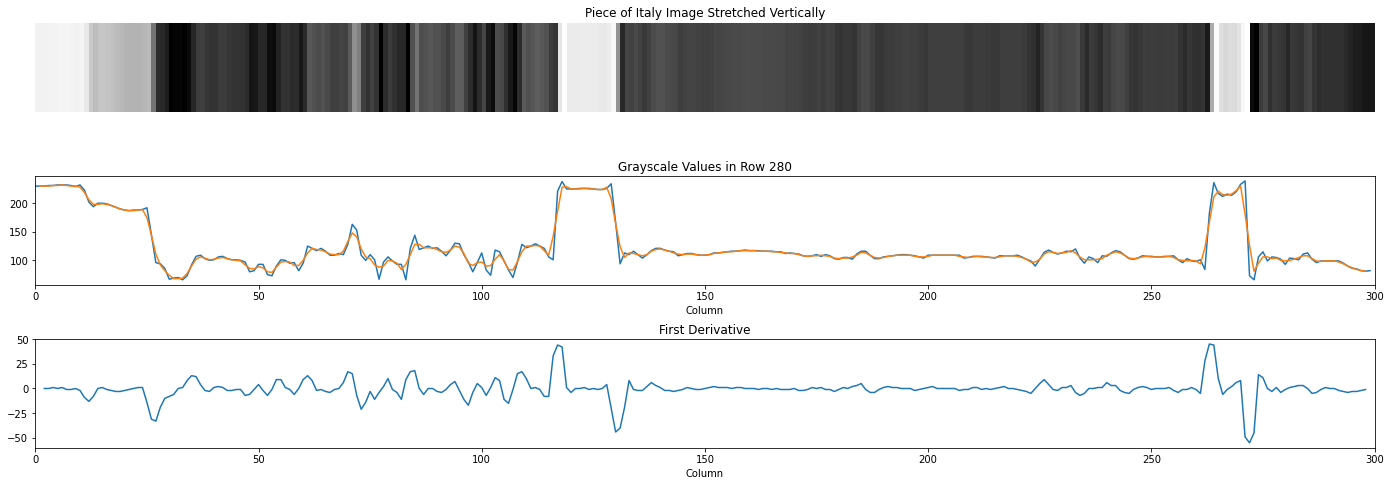

In [5]:
def rolling_centered_average(x, n):
    out = np.full_like(x, np.nan)
    out[(n - 1) // 2 : -(n // 2)] = np.convolve(x, np.ones(n), mode="valid") / n
    return out

gray_img = np.array(Image.open('gray_italy.jpg'))
slice = gray_img[280:281,:300]

x = gray_img[280,:300]
smoothed = rolling_centered_average(x,3)
first_deriv = np.convolve(smoothed[1:-1], np.array([1,-1]), mode="valid")

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(24, 8),gridspec_kw={'hspace': 0.5})
ax[0].imshow(np.tile(slice,(20,1)), cmap='gray')
ax[0].axis('off')     
ax[0].set_title('Piece of Italy Image Stretched Vertically')  

ax[1].plot(np.arange(0,300),x)
ax[1].plot(np.arange(1,299), smoothed[1:-1])
ax[1].set_xlabel('Column')
ax[1].set_xlim(0,300)
ax[1].set_title('Grayscale Values in Row 280')

ax[2].plot(np.arange(2,299),first_deriv)
ax[2].set_xlabel('Column')
ax[2].set_xlim(0,300)
ax[2].set_title('First Derivative')
plt.show()

We can see large spikes and dips in the graph of the first derivative where there are abrupt changes in the grayscale values of the row in the image. We can find edges by detecting the local minima and maxima of the first derivative! Since images have two dimensions, a row and column coordinate for each pixel, the example we just went through is a partial derivative.

Let $f(x,y)$ be a continuous grayscale image mapping $\mathbb{R}^2$ to $\mathbb{R}$.
When we read in an image in Python we are observing a sampling of points of $f(x,y)$ which we will call $f_d(n,m)$.
So, $f_d(n,m) = f(n\Delta x, m \Delta y)$.
where $\Delta x$ and $\Delta y$ are the sampling distances along the x and y-axis, respectively.
Taking partial derivatives of $f$ can be approximated by the forward difference formulas,

\begin{align*}
    \frac{df}{dx}(n\Delta x,m \Delta y) &\approx \frac{f(n\Delta x+\Delta x,m \Delta y)-f(n\Delta x,m \Delta y)}{\Delta x}
                                            = \frac{f_d(n+1,m)-f_d(n,m)}{\Delta x} \\
    \frac{df}{dy}(n\Delta x,m \Delta y) &\approx \frac{f(n\Delta x,m \Delta y+\Delta y)-f(n\Delta x,m \Delta y)}{\Delta y}
                                            = \frac{f_d(n,m+1)-f_d(n,m)}{\Delta y}
\end{align*}


The gradient of $f$ is $
    \nabla f = \begin{pmatrix}  \frac{df}{dx} \\  \\ \frac{df}{dy}\end{pmatrix}$
with magnitude $
    |\nabla f| = \sqrt{\left(\frac{df}{dx}\right)^2 + \left(\frac{df}{dy}\right)^2}$
and direction $
    \theta = \arctan \left(\left(\frac{df}{dy}\right) / \left(\frac{df}{dx}\right)\right).$

### <span style="color:red"> Exercise 1 </span>

**Part 1**

What are the physical interpretations for $|\nabla f|$ and $\theta$?

<h3 style="background-color:lightblue"> Write Answers for Exercise 1 Part 1 Below </h3>

The magnitude is the rate of change of the color (intensity) and the direction is whether it is from black to white or vice versa (increase or decrease) along the edge.

**Choose an image and apply a grayscaling method from Lab 4 on color quantization.**

**Part 2**

At each point of the the grayscaled image, compute the scalar value $|\nabla f|$. Plot the new grayscale image containing the magnitute of the gradient of the original grayscaled image.

**Part 3**

Pick a threshold for how large the gradient needs to be in order to detect an edge. Justify your choice. 

**Part 4**

Plot the edge image so that edge pixels are white and non-edge pixels are black. 


<h3 style="background-color:lightblue"> Write Answers for Exercise 1 Parts 2-4 Below </h3>

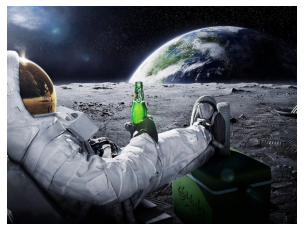

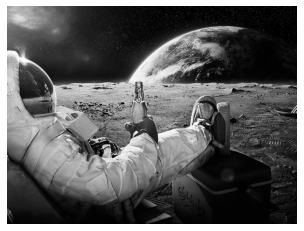

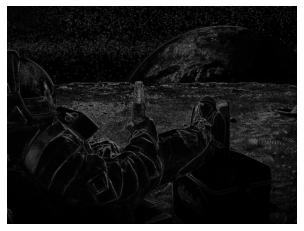

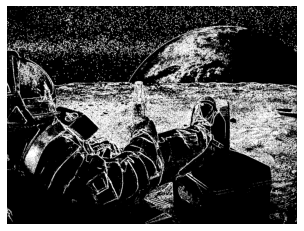

In [7]:
# part 2
def showimage(gray_img):
    plt.imshow(np.array(gray_img), cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()

def grayscale_image(img):
    img = np.array(img, dtype='float64')
    gray = np.zeros((img.shape[0], img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            gray[i, j] = (img[i, j, 0] * 0.2989 + img[i, j, 1] * 0.5870 + img[i, j, 2] * 0.1140)
    return gray

def gradient_magnitude(gray_img, delta_x=1, delta_y=1):
    grad_mag = np.zeros_like(gray_img)
    for i in range(gray_img.shape[0] - 1):
        for j in range(gray_img.shape[1] - 1):
            df_dx = (gray_img[i + 1, j] - gray_img[i, j]) / delta_x
            df_dy = (gray_img[i, j + 1] - gray_img[i, j]) / delta_y
            grad_mag[i, j] = np.sqrt(df_dx**2 + df_dy**2)
    return grad_mag

img = Image.open('wp10411567.jpg')
gray_img = grayscale_image(img)
grad_mag = gradient_magnitude(gray_img)

showimage(img)
showimage(grayscale_image(img))

plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# part 3 and 4

threshold = 20
#Threshold between 15 ~ 25 was good enough to detect the edge of the bottle from moon at the background.

def threshold_for_edges(grad_mag, threshold):
    edge_img = np.zeros_like(grad_mag, dtype=np.uint8)
    edge_img[grad_mag >= threshold] = 255
    return edge_img

edge_img = threshold_for_edges(grad_mag, threshold)
plt.imshow(edge_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()


**Part 5**

Repeat Parts 2-4 using the following symmetric difference formulas for partial derivatives:
\begin{align*}
    \frac{df}{dx}(n\Delta x,m \Delta y) &\approx \frac{f_d(n+1,m)-f_d(n-1,m)}{2\Delta x} \\
    \frac{df}{dy}(n\Delta x,m \Delta y) &\approx \frac{f_d(n,m+1)-f_d(n,m-1)}{2\Delta y} \\
\end{align*}

<h3 style="background-color:lightblue"> Write Answers for Exercise 1 Part 5 Below </h3>

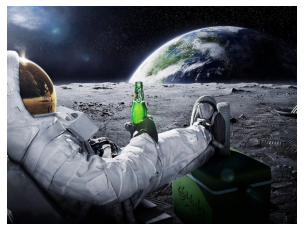

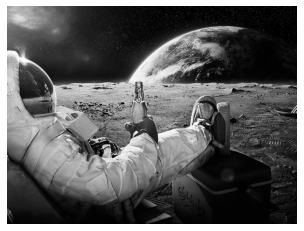

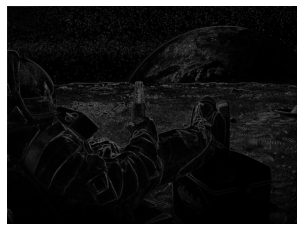

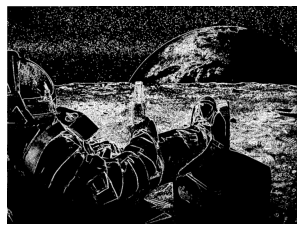

In [8]:
# part 2
def showimage(gray_img):
    plt.imshow(np.array(gray_img), cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()

def grayscale_image(img):
    img = np.array(img, dtype='float64')
    gray = np.zeros((img.shape[0], img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            gray[i, j] = (img[i, j, 0] * 0.2989 + img[i, j, 1] * 0.5870 + img[i, j, 2] * 0.1140)
    return gray

def gradient_magnitude(gray_img, delta_x=1, delta_y=1):
    grad_mag = np.zeros_like(gray_img)
    for i in range(gray_img.shape[0] - 1):
        for j in range(gray_img.shape[1] - 1):
            df_dx = (gray_img[i + 1, j] - gray_img[i-1, j]) / (2 * delta_x)
            df_dy = (gray_img[i, j + 1] - gray_img[i, j-1]) / (2 * delta_y)
            grad_mag[i, j] = np.sqrt(df_dx**2 + df_dy**2)
    return grad_mag

img = Image.open('wp10411567.jpg')
gray_img = grayscale_image(img)
grad_mag = gradient_magnitude(gray_img)

showimage(img)
showimage(grayscale_image(img))

plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# part 3 and 4

threshold = 20
#Threshold between 15 ~ 25 was good enough to detect the edge of the bottle from moon at the background.

def threshold_for_edges(grad_mag, threshold):
    edge_img = np.zeros_like(grad_mag, dtype=np.uint8)
    edge_img[grad_mag >= threshold] = 255
    return edge_img

edge_img = threshold_for_edges(grad_mag, threshold)
plt.imshow(edge_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()


**Part 6**

Describe the differences, if any, between the two edge detectors. 

<h3 style="background-color:lightblue"> Write Answers for Exercise 1 Part 6 Below </h3>

I can't tell any difference between the results at the same threshold.

## <span style="color:orange;"> 2. Derivatives </span>

The previous exercise has you detect edges based on the first derivative. Another approach is to build an edge detector based on the second derivative because when the second derivative is zero, there is a local minimum or maximum in the first derivative. The strategy is to approximate $\frac{d^2f}{dx^2}, \frac{d^2f}{dxdy}$ and $\frac{d^2f}{dy^2}$ using the information we have available, that is $f_d(n,m)$, and then check where the second derivative changes from positive to negative or vice versa.

Let's simplify for a moment and see how to approach this in 1 dimension. Suppose $g(x)$ is a continuous function and is infinitely differentiable at the point $a$. The Taylor series of $g(x)$ at $a$ is $
    g(x) = g(a) + \frac{g'(a)}{1}(x-a) + \frac{g''(a)}{1\cdot 2}(x-a)^2 + \frac{g'''(a)}{1\cdot 2\cdot 3}(x-a)^3 + \cdots  $
This sum goes on forever, but if we truncate after a few terms we can get a good estimation of the function $g(x)$ near $a$.
Say we want to approximate $g'(a)$.
By evaluating $g(x)$ at $x=a+h$ and $x=a-h$ where $h>0$ is a small positive number and only keeping the first two terms in the Taylor series,
\begin{align*}
    g(a+h) &\approx g(a) + \frac{g'(a)}{1}((a+h)-a) = g(a) + g'(a)h\\ 
    g(a-h) &\approx g(a) + \frac{g'(a)}{1}((a-h)-a) = g(a) - g'(a)h.\\ 
\end{align*}
    
Now, subtract $g(a+h)$ and $g(a-h)$ to get $
    g(a+h) - g(a-h) \approx 2g'(a)h \quad \Rightarrow \quad g'(a) \approx \frac{g(a+h)-g(a-h)}{2h},$
which is the same symmetric difference formula you've seen before.
To approximate the second derivative $g''(a)$, use the estimations
\begin{align*}
    g(a+h) &\approx g(a) + \frac{g'(a)}{1}((a+h)-a) + \frac{g''(a)}{1\cdot 2}((a+h)-a)^2 = g(a) + g'(a)h + g''(a)h^2 \\ 
    g(a-h) &\approx g(a) + \frac{g'(a)}{1}((a-h)-a) + \frac{g''(a)}{1\cdot 2}((a-h)-a)^2 = g(a) - g'(a)h + g''(a)h^2. \\ 
\end{align*}
    
<br>

### <span style="color:red"> Exercise 2 </span>

Finish the derivation of the estimation of $g''(a)$. Your estimation should only depend on function values of $g$.

Write your answer using LaTeX showing your steps. Remember that you can double-click on the cells above to see how to format equations in LaTeX.

<h3 style="background-color:lightblue"> Write Answers for Exercise 2 Below </h3>

Add $g(a+h)$ and $g(a-h)$ to get
\begin{align*}
    g(a+h) + g(a-h) \approx 2g(a) + 2g''(a)h^2 \\ 
    g''(a)
     \approx \frac{g(a+h)+g(a-h)}{2h^2} - \frac{g(a)}{h^2} \\ 
\end{align*}


Going back to the 2-dimensional case, the Taylor series of the funtion $f(x,y)$ at the point $(a,b)$ is $$
    f(x,y) = f(a,b) + (x-a)\frac{df}{dx}(a,b) + (y-b)\frac{df}{dy}(a,b) + 
        \frac{(x-a)^2\frac{d^2f}{dx^2}(a,b) + 2(x-a)(y-b)\frac{d^2f}{dxdy}(a,b) + (y-b)^2\frac{d^2f}{dy^2}(a,b)}{1 \cdot 2} + \cdots$$

The second partial derivative test states that $f(x,y)$ has a local minimum, local maximum, or saddle point at the point $(a,b)$ if 
$$\left[\frac{d^2f}{dx^2}(a,b) \right] \left[\frac{d^2f}{dy^2}(a,b) \right] - \left[\frac{d^2f}{dxdy}(a,b) \right]^2 = 0.$$

Similar to the 1-dimensional case, we can use Taylor series to derive approximations for $\frac{d^2f}{dx^2},\frac{d^2f}{dy^2}$ and $\frac{d^2f}{dxdy}$.

For $\frac{d^2f}{dx^2}$, evaluate $f$ at $(x,y)=(a+h,b)$ and $(x,y)=(a-h,b)$ where $h>0$ is a small positive number.

\begin{align*}
    f(a+h,b) &\approx f(a,b) + h\frac{df}{dx}(a,b) + \frac{h^2\frac{d^2f}{dx^2}(a,b)}{2} \\ 
    f(a-h,b) &\approx f(a,b) - h\frac{df}{dx}(a,b) + \frac{h^2\frac{d^2f}{dx^2}(a,b)}{2} \\ 
    \Rightarrow f(a+h,b)+f(a-h,b) &\approx 2f(a,b) + h^2\frac{d^2f}{dx^2}(a,b) \\ 
    \Rightarrow \frac{d^2f}{dx^2}(a,b) &\approx \frac{f(a+h,b)+f(a-h,b)-2f(a,b)}{h^2}
\end{align*}

### <span style="color:red"> Exercise 3 </span>

Derive the estimations of $\frac{d^2f}{dy^2}$ and $\frac{d^2f}{dxdy}$. Your estimations should only depend on function values of $f$.

Write your answer using LaTeX showing your steps. Remember that you can double-click on the cells above to see how to format equations in LaTeX.

<h3 style="background-color:lightblue"> Write Answers for Exercise 3 Below </h3>


\begin{align*}
    \frac{d^2f}{dy^2}(a,b) &\approx \frac{f(a,b+h)+f(a,b-h)-2f(a,b)}{h^2} \\
\end{align*}

\begin{align*}
    \frac{df}{dx}(a,b+h) \approx (f(a+h, b+h)-f(a-h, b+h))/(2h) \\
    \frac{df}{dx}(a,b-h) \approx (f(a+h, b-h)-f(a-h, b-h))/(2h) \\
    \frac{d^2f}{dxdy}(a,b) \approx (\frac{df}{dx}(a,b+h)-\frac{df}{dx}(a, b-h))/(2h) \\
    \frac{d^2f}{dxdy}(a,b) \approx \frac{\frac{f(a+h, b+h) - f(a-h, b+h)}{2h} - \frac{(f(a+h, b-h) - f(a-h, b-h))}{2h}}{2h}\\
    \frac{d^2f}{dxdy}(a,b) \approx \frac{f(a+h, b+h) - f(a+h, b-h) - f(a-h, b+h) + f(a-h, b-h)}{4h^2}
\end{align*}

## <span style="color:green"> Reflection </span>

__1. What parts of the lab, if any, do you feel you did well? <br>
2. What are some things you learned today? <br>
3. Are there any topics that could use more clarification? <br>
4. Do you have any suggestions on parts of the lab to improve?__

<h3 style="background-color:lightblue"> Write Answers for the Reflection Below </h3>

1. NA
2. It is cool to learn how first and second derivatives can be used to detect edges of an image. Applications of calculus in real life makes me appreciate it more. 
3. NA
4. NA